As seen earlier in confidence intervals, using Wald's method for the sample proportions do not yield promising results as widely believed. So we will only stick to case when conditions are met to make the sampling distribution normalcy good enough. 

# When sample sizes are high

Suppose that we have a normal **sampling distribution** described by random variable $\dfrac{Y}{n} = N\Big(p_1, \dfrac{p_1q_1}{n}\Big)$ created from a population distribution which is a Bernoulli distribution with mean $p_1$ and standard deviation $p_1q_1$. Note that $Y$ represents the sum of _successes_ in a sample set, and thus $\dfrac{Y}{n}$ represents sample proportions. For example, for any _kth_ sample set of $\dfrac{Y}{n}$, we calculate sample proportion statistic, $\dfrac{Y_{k}}{n} = \dfrac {1}{n} \sum\limits_{i=1}^n Y_{ki}$, where $Y_{ki}$ is $i$th sample in $k$th sample set of sampling distribution described by $\dfrac{Y}{n}$. If $\alpha$ is the significance level, then we could derive the conditions for hypothesis testing as follows. Below is our sampling distribution as null hypothesis, with $\alpha$ as significance level. This is for alternate hypothesis being $H_a: \mu > \mu_{y/n}$ so we consider the right tail area. One could try similar approach for left or both tails depending on if $H_a$ is $H_a: \mu < \mu_{y/n}$ or $H_a: \mu \neq \mu_{y/n}$ respectively. 

In [ ]:
%load_ext tikzmagic

In [8]:
preamble = '''
    \pgfmathdeclarefunction{gauss}{3}{%
      \pgfmathparse{1/(#3*sqrt(2*pi))*exp(-((#1-#2)^2)/(2*#3^2))}%
    }
'''

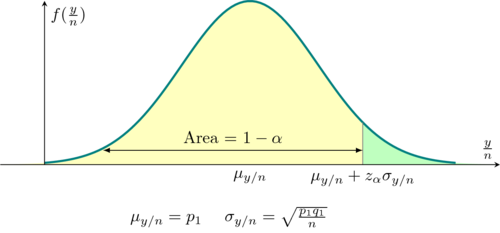

In [9]:
%%tikz -p pgfplots -x $preamble -s 500,500
 \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$\frac{y}{n}$,
        ylabel=$f(\frac{y}{n})$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.645*\sd}
    \def\cihigh{\mean + 1.645*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow-2:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)}
    \closedcycle;

    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
    \draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

    
    \node[below] at (axis cs:\mean, 0)  {$\mu_{y/n}$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$\mu_{y/n} + z_{\alpha}\sigma_{y/n}$}; 
    
    \node[below=0.75cm,text width=5cm] at (axis cs:\mean, 0)
    {
        $\mu_{y/n} = p_1 \ \ \ \ \sigma_{y/n} = \sqrt{\frac{p_1q_1}{n}}$
    };
    
    \end{axis}

The significance level $\alpha$, corresponds to the rest of $1-\alpha$ area, that is green area as shown above. 

\begin{equation}
    \begin{aligned}
        P\Big(  \frac{Y}{n} \geq \mu_{y/n} + z_{\alpha}\sigma_{y/n} \Big) = \alpha \nonumber \\
        \therefore P\Bigg(  \dfrac{\dfrac{Y}{n} -  \mu_{y/n}}{\sigma_{y/n}} - \geq z_{\alpha} \Bigg) = \alpha \nonumber \\
        P\Bigg(  \dfrac{\dfrac{Y}{n} -  p_1}{ \sqrt{\frac{p_1q_1}{n}} } - \geq z_{\alpha} \Bigg) = \alpha \label{eq:201}
    \end{aligned}
\end{equation}

Let the z score be,  $z = \dfrac{\frac{Y}{n} - \mu_{y/n}}{\sigma_{y/n}}$, then $P(z \geq z_{\alpha}) = \alpha$

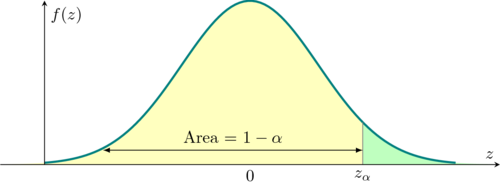

In [10]:
%%tikz -p pgfplots -x $preamble -s 500,500
\begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$z$,
        ylabel=$f(z)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.645*\sd}
    \def\cihigh{\mean + 1.645*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow-2:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)}
    \closedcycle;

    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
    \draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

    
    \node[below] at (axis cs:\mean, 0)  {$0$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$z_{\alpha}$}; 
    

    \end{axis}

Our allowed critical region in sampling distribution is $(\mu_{y/n} + z_{\alpha}\sigma{y/n}, \infty)$, where the probability of making Type I error is $\alpha$. Our allowed critical region in _standardized_ sampling distribution would be $(z_{\alpha}, \infty)$. So if our z score falls within $(z_{\alpha}, \infty)$, we could reject the null hypothesis. This is also equivalent to saying, if our sample set proportion $y/n$ falls within $(\mu_{y/n} + z_{\alpha}\sigma{y/n}, \infty)$, we could reject the null hypothesis. 

\ 


_It was claimed that many commercially manufactured dice are not fair because the “spots” are really indentations, so that, for example, the 6-side is lighter than the 1-side. To test, in an experiment, several such dice were rolled, to yield a total of $n=8000$ observations, out of which 6 resulted, $1389$ times. Is there a significant evidence that dice favor a 6 far more than a fair die would? Assume $\alpha = 0.05$_

**Solution:**

Let us assume null hypothesis as a fair die, nothing to doubt about. The probability of getting a 6 in fair die is $p=1/6$. So  

$H_0: \mu_{y/n} = p = 1/6$  
$H_a: \mu_{y/n} = p \neq 1/6$

We have a sample size of $n=8000$, so $np = (8000)(1/6) = 1333 >> 10, nq = (8000)(5/6) = 6666 >> 10$, so our normal condition is met. If we continue with sample sets of this size, we would get a good normal sampling distribution $\dfrac{Y}{n}$

Our z score is $z = \dfrac{\frac{Y}{n} - p_1}{\sqrt{\frac{p_1q_1}{n}}} = \dfrac{(1389/5000) - (1/6)}{\sqrt{\frac{(1/6)(5/6)}{8000}}}$

In [11]:
Y,n,p_1,q_1 = 1389, 8000, 1/6,5/6
num = (Y/n) - (p_1)
from math import sqrt
den = sqrt(p_1*q_1/n)
zs = round(num/den, 4)
print(zs)

1.67


Our **allowed** critical region starts from $z_{0.05} = 1.645$. The z score $z = 1.67$ is greater that that,  which means, if we select this sample set as critical region's starting point, our probability of making Type I error is  smaller than allowed $\alpha = 0.05$. So we **reject the null hypothesis** , thus suggesting there is stronger evidence for alternate $H_a$. 

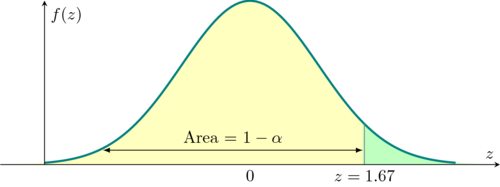

In [12]:
%%tikz -p pgfplots -x $preamble -s 500,500
    \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$z$,
        ylabel=$f(z)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.645*\sd}
    \def\cihigh{\mean + 1.645*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow-2:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [draw=none, fill=green!25, domain=\cihigh:\cihigh+2] {gauss(x, \mean, \sd)}
    \closedcycle;

    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    %\pgfmathsetmacro\valueA{gauss(\cihigh,\mean,\sd)}
    %\draw [gray] (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    
    \def\zs{\mean + 1.67*\sd}
    \pgfmathsetmacro\valueB{gauss(\zs,\mean,\sd)}
    \draw [gray] (axis cs:\zs,0) -- (axis cs:\zs,\valueB);
    
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow-0.5, 0) -- node [above] {Area = $1-\alpha$} (axis cs:\cihigh, 0);   

    
    \node[below] at (axis cs:\mean, 0)  {$0$}; 
    \node[below] at (axis cs:\zs, 0)  {$z=1.67$}; 
    

    \end{axis}

# Conditions Summary